<a href="https://colab.research.google.com/github/rafaelpds/Projetos_Data_Science/blob/main/QConcurso/challenge_qconcurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visão Geral

O processo de aprovação em concursos públicos no Brasil exige cada vez mais uma preparação focada, equilibrada e direcionada. Nós, da Qconcursos, buscamos frequentemente evoluir nosso produto para facilitar esse processo de aprendizagem. Nesse sentido, buscamos contar com os melhores métodos educacionais e as melhores práticas tecnológicas.

Estamos convencidos de que o conceito de aprendizagem adaptativa se apresenta como uma possível solução para auxiliar os examinandos em sua metodologia de aprendizagem e, consequentemente, na busca pela carreira pública dos sonhos. Em geral, a ideia é adaptar o ensino e moldá-lo às necessidades e ritmo de aprendizagem de cada aluno dentro da nossa plataforma.

**O objetivo desta competição é criar um modelo de aprendizado de máquina capaz de prever a probabilidade de um determinado aluno acertar a próxima questão, dada uma sequência anterior de cem resoluções.**

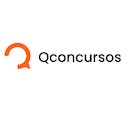



Fonte de Dados:

https://drive.google.com/drive/folders/1VtFkocuaNB8oo3bqF0VCx6ctnJwXitx_

**Dicionário dos Dados Disponibilizados:**

**resolvidas_questions_users -** Nesta tabela estão as informações sobre as resoluções e sobre as questões que foram resolvidas, além das informações dos usuários.

- user_id - identificação do usuário
- city - cidade do usuário
- country - país do usuário
- device - dispositivo
- device_type	 - tipo do dispositivo
- os - sistema operacional
- platform - tipo de acesso
- region - Região do usuário
- gp:carrers - carreira de preferência do usuário
- gp:college type - Universidade de preferência
- gp:degree course	- Curso de preferência na universidade
- gp:previous experience	- experiência prévia como concurseiro
- gp:school type - tipo de escola que se formou
- gp:source_project - ambiente de preferência do usuário
- question_id	- identificação da questão
- acertou - (errou (0), acertou (1))
- created_at - data de resolução da questão
- commented_by_professor - (não possui comentários do professor (0), possui comentário do professor (1))
- difficulty - dificuldade da questão
- discipline_id - disciplina da questão
- examining_board_id - banca da questão
- institute_id	- instituto da questão
- knowledge_area_id - área de conhecimento da questão
- modality_id	- tipo da questão (1, significa múltipla escolha (A,B,C,D ou E) e 2 significa certo ( C ) ou errado ( E ). 
- nullified - questões anuladas
- outdated - questões desatualizadas
- product_id - a qual produto a questão pertence
- publication_year - ano em que a questão foi publicada	
- right_answer - alternativa correta (A,B,C,D ou E), se for questão de múltipla escolha ou (C ou E) se for questão de certo ou errado 
- scholarity_id - escolaridade da questão	
- subjects_questions - Nesta tabela estão informações adicionais sobre as questões que foram resolvidas pelos usuários
- question_id - identificação da questão
- subject_id - identificação do assunto

In [6]:
import pandas as pd
import numpy as np

from google.colab import drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df_model = pd.read_csv("/content/drive/My Drive/QConcursos/Dataset_model.csv")
df_sub_question = pd.read_csv("/content/drive/My Drive/QConcursos/subjects_questions.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df_model.head(3)

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489400
1,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,C,2.0,489399
2,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,D,2.0,489398


In [13]:
df_sub_question.head(3)

,subject_id,novo_question_id
0,14655.0,15
1,19271.0,15
2,14655.0,16
